# 🎨 Stable Diffusion Image Generation Demo

This notebook demonstrates how to generate images using the **Stable Diffusion v1.5** model via Hugging Face's `diffusers` library.

You can input your own text prompts, and the model will generate high-quality images based on those descriptions.

In [36]:
# Install requirements
# !pip install -r requirements.txt

In [37]:
# Imports
# for loading and using the model using pytorch
import torch
# stable diffusion pipeline for stable diffusion 1.5
from diffusers import StableDiffusionPipeline
import os
from datetime import datetime
# for displaying and opening the image
from PIL import Image
# for reading values from config
import configparser

## Setup Config

In [38]:
def load_config():
    """
    Load configuration from config.ini file.
    
    Returns:
        configparser.ConfigParser: Configuration object
    """
    config = configparser.ConfigParser()
    config_path = '../config.ini'
    
    if os.path.exists(config_path):
        config.read(config_path)
        print("Configuration loaded from config.ini")
    else:
        print("config.ini not found")
    
    return config

config = load_config()

Configuration loaded from config.ini


## Setup the Stable Diffusion Pipeline

In [39]:
def setup_pipeline(config):
    """
    Initialize and configure the Stable Diffusion pipeline.
    
    Args:
        config: Configuration object from config.ini
    
    Returns:
        StableDiffusionPipeline: Configured pipeline ready for image generation
    """
    print("Loading Stable Diffusion model...")
    
    # Get model paths from config
    local_model_path = config.get('Model', 'local_model_path')
    huggingface_model = config.get('Model', 'huggingface_model')
    
    # Check if local model exists
    if os.path.exists(local_model_path):
        print(f"Using local model from: {local_model_path}")
        # Load the model from local path
        pipe = StableDiffusionPipeline.from_pretrained(local_model_path)
    else:
        print("Local model not found, downloading from Hugging Face...")
        # Fallback to downloading from Hugging Face
        pipe = StableDiffusionPipeline.from_pretrained(huggingface_model)
    
    # Configure device (MPS for Mac M1/M2, CUDA for NVIDIA GPUs, CPU as fallback)
    if torch.backends.mps.is_available():
        device = "mps"
        print("Using MPS (Apple Silicon GPU)")
    elif torch.cuda.is_available():
        device = "cuda"
        print("Using CUDA (NVIDIA GPU)")
    else:
        device = "cpu"
        print("Using CPU (slower generation)")
    
    pipe.to(device)
    return pipe

pipe = setup_pipeline(config)

Loading Stable Diffusion model...
Local model not found, downloading from Hugging Face...


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 16.91it/s]


Using MPS (Apple Silicon GPU)


## Enter a Prompt for Image Generation

In [40]:
prompts = ["biscuits on a table",
           """perfectly crafted round whole cake, topped with a generous drizzle of honey, the honey cascading down the sides of the cake, elegantly presented with a 
           refined and luxurious touch""", 
           """100mm raw camera, f/2.8, professional food photo of salmon steak, spinach, lemon, steam, superrealistic, soft light, exposure blend, medium shot, 
           (muted colors, dim colors, soothing tones:1.3)"""]
prompt = prompts[2]

## Generate Image

In [41]:
def generate_image(pipe, prompt):
    print(f"Generating image for: '{prompt}'")
    result = pipe(prompt)
    return result.images[0]

image = generate_image(pipe, prompt)
image.show()

Generating image for: '100mm raw camera, f/2.8, professional food photo of salmon steak, spinach, lemon, steam, superrealistic, soft light, exposure blend, medium shot, 
           (muted colors, dim colors, soothing tones:1.3)'


100%|██████████| 50/50 [00:14<00:00,  3.51it/s]


## Save the Generated Image

In [42]:
def save_image(image, prompt, config):
    """
    Save the generated image in the output folder with prompt name.
    
    Args:
        image: PIL Image to save
        prompt (str): Original prompt used for generation
        config: Configuration object from config.ini
    
    Returns:
        str: Path to the saved image file
    """
    # Get output directory from config
    output_dir = config.get('Output', 'output_dir')
    max_filename_length = config.getint('Output', 'max_filename_length')
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a safe filename from the prompt
    safe_prompt = "".join(c for c in prompt if c.isalnum() or c in (' ', '-', '_')).rstrip()
    safe_prompt = safe_prompt.replace(' ', '_')[:max_filename_length]  # Use config length
    
    # Add timestamp for uniqueness
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{safe_prompt}_{timestamp}.png"
    
    # Full path to save the image
    filepath = os.path.join(output_dir, filename)
    
    # Save the image
    image.save(filepath)
    print(f"💾 Image saved as: {filepath}")
    
    return filepath

save_image(image, prompt, config)

💾 Image saved as: output/100mm_raw_camera_f28_professional_food_photo_of_sa_20250705_084247.png


'output/100mm_raw_camera_f28_professional_food_photo_of_sa_20250705_084247.png'

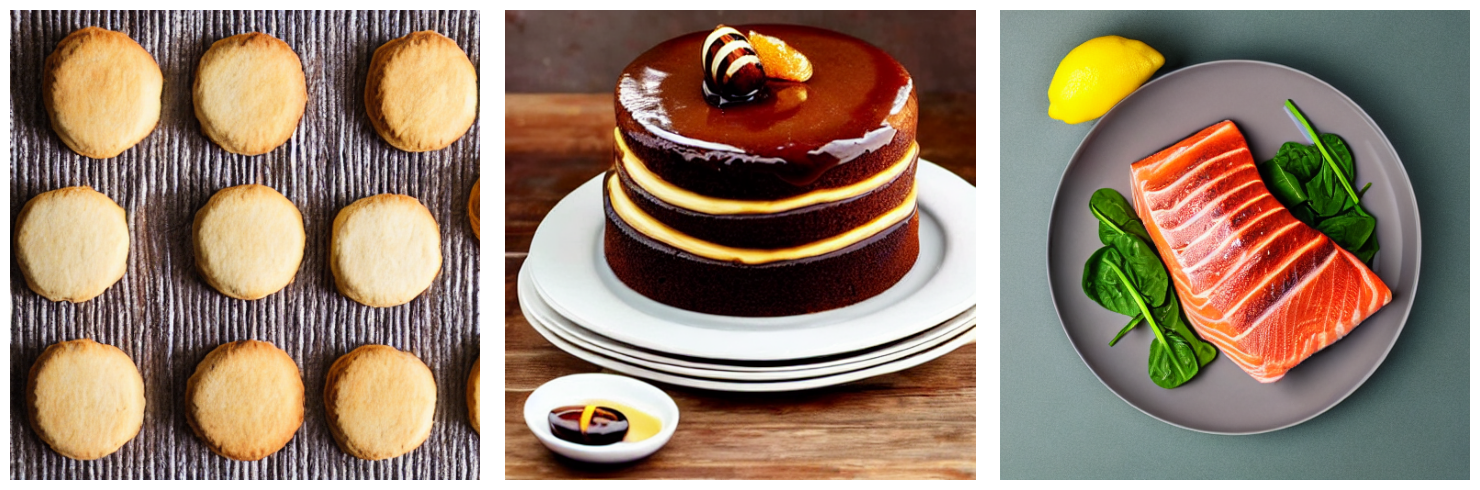

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import glob

# Get all images from output folder
output_dir = "output"
image_files = glob.glob(f"{output_dir}/*.png") + glob.glob(f"{output_dir}/*.jpg")

image_files = image_files[::-1]

# Display images
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
if len(image_files) == 1:
    axes = [axes]

for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    # Remove title
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import glob

# Get all images from output folder
output_dir = "output/gen_images"
image_files = glob.glob(f"{output_dir}/*.png") + glob.glob(f"{output_dir}/*.jpg")

image_files = image_files[::-1]

# Display images
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
if len(image_files) == 1:
    axes = [axes]

for i, img_path in enumerate(image_files):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    # Remove title
    axes[i].axis('off')

plt.tight_layout()
plt.show()